In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import cross_val_score


In [2]:
#fetching the dataset and printing name & description
cal_housing = fetch_california_housing()
print(cal_housing.feature_names)
print(cal_housing.DESCR)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [3]:
#storing the dataset into pandas dataframe
df_calhouse=pd.DataFrame(cal_housing.data,columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])
df_calhouse['AvgPrice']=cal_housing.target
print(df_calhouse.head(10))
                       

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  AvgPrice  
0    -122.23     4.526  
1    -122.22     3.585  
2    -122.24     3.521  
3    -122.25     3.413  
4    -122.25     3.422  
5    -122.25 

In [4]:
#getting to know the data
print(df_calhouse.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude      AvgPrice  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [7]:
#checking for null values
print(df_calhouse.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
AvgPrice      0
dtype: int64


In [8]:
#Checking Correlation among the features
df_calhouse.corr()
#AvgPrice is correlated with MedInc,HouseAge&AveRooms. there is correlation among the features as well
#e:g AveRooms&MedInc(0.326),AveBedrms&AveRooms

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvgPrice
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
AvgPrice,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


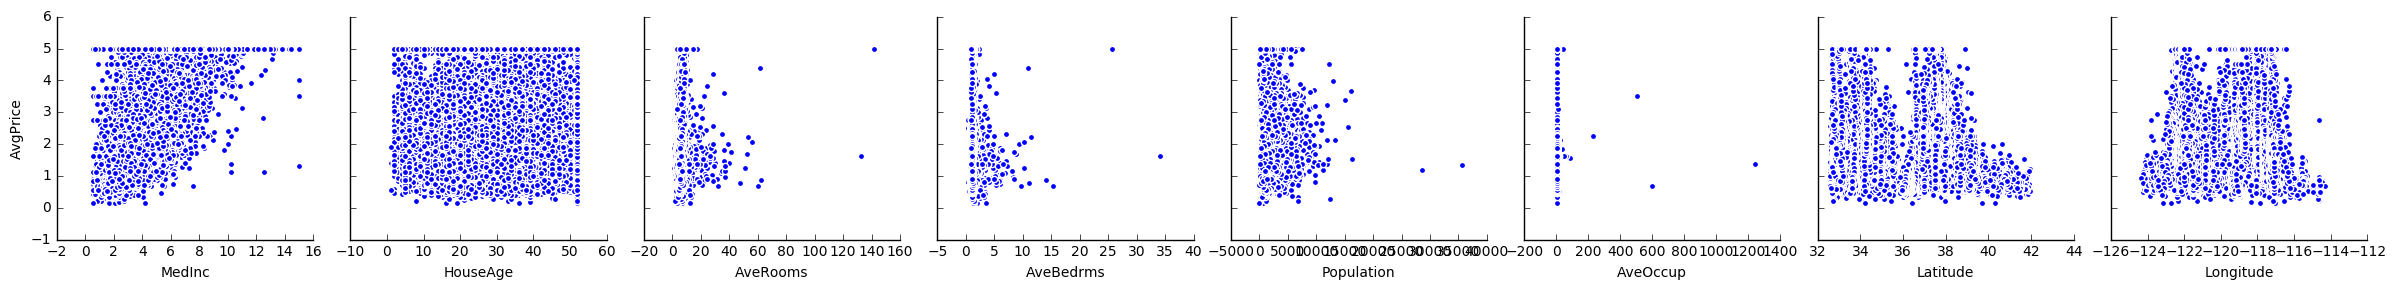

In [10]:
feature_col=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
#Scatterplot of the features
sns.pairplot(df_calhouse, x_vars=feature_col, y_vars='AvgPrice',  kind='scatter',size=3)

In [11]:
#Running simple linear regression
feature_col=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
y=df_calhouse['AvgPrice']
X=df_calhouse[feature_col]

lm= linear_model.LinearRegression()
lm.fit(X,y)
scores=cross_val_score(lm, X, y, n_jobs=1, cv=10,scoring='mean_squared_error')
mse_scores=-scores
print(np.sqrt((mse_scores)).mean())
 

0.730740336315


In [12]:
#Linear Regression with less features
feature_col=['MedInc','AveRooms','Population','Latitude','Longitude']
y=df_calhouse['AvgPrice']
X=df_calhouse[feature_col]

lm= linear_model.LinearRegression()
lm.fit(X,y)
scores=cross_val_score(lm, X, y, n_jobs=1, cv=10,scoring='mean_squared_error')
mse_scores=-scores
print(np.sqrt((mse_scores)).mean())

0.742833165758


In [13]:
#Lasso Regression after datascaling
feature_col=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
y=df_calhouse['AvgPrice']
X=df_calhouse[feature_col]


from sklearn.preprocessing import RobustScaler
X_transform= RobustScaler().fit_transform(X)

clf = linear_model.LassoCV(alphas=(.001, .001, .01, .1, .5, 1,10,25,30,35,40,41,42,43,44,45,46,47,48,49,50,60,100))
clf.fit(X_transform,y)
scores=cross_val_score(clf, X_transform, y, n_jobs=1, cv=10,scoring='mean_squared_error')
mse_scores=-scores
print(np.sqrt((mse_scores)).mean())

0.730680464344


In [14]:
#Applying RandomForest
feature_col=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
y=df_calhouse['AvgPrice']
X=df_calhouse[feature_col]
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=50, random_state=42)
rf.fit(X, y)
scores=cross_val_score(rf, X, y, n_jobs=1, cv=10,scoring='mean_squared_error')
mse_scores=-scores
print(np.sqrt((mse_scores)).mean())
print(rf.feature_importances_)

0.667805049368
[ 0.52207834  0.05269486  0.0418778   0.02809599  0.03267626  0.13705109
  0.09348501  0.09204065]
